In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import files
engagement = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])
users = pd.read_csv('takehome_users.csv',  encoding = "ISO-8859-1", parse_dates=['creation_time', 'last_session_creation_time'])

In [3]:
engagement.head(10)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [4]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [5]:
#find sort the values
engagement = engagement.sort_values(by = ['user_id','time_stamp']).reset_index()

In [6]:
#find all the adopted users
index = 0
adopted_users = set()
current = engagement.user_id[0]

#implement sliding window technique
window = [engagement.time_stamp[0]]
for user in engagement.user_id:
    time = engagement.time_stamp[index]
    #condition if current id is equal to engagement id
    if user == current:
        #same pass
        if window[-1].day == time.day:
            pass
        #different we want to add the user id if condition is met
        else:
            window.append(time)
            while (time-window[0]).days > 7:
                window.pop(0)
            if len(window) == 3:
                adopted_users.add(user)
    #if current id is not equal to engagement id. we reset the sliding window
    else:
        current = user
        window = [time]
    index +=1

In [7]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


In [9]:
#create adopted column for users who have adopted the platform

#sort user by id
adopted_user = sorted(list(adopted_users))

#create adopt column
users['adopt'] = False
users = users.sort_values(by = 'object_id')
users = users.reset_index()

index = 0
for ident in users.object_id:
    #change to yes if adopt user is the same 
    if ident == adopted_user[0]:
        users['adopt'][index] = True
        adopted_user.pop(0)
    #break out of loop is nothing is in adopt user
    if not adopted_user:
        break    
    #if adopt user is not in user dataframe. remove 
    while ident >= adopted_user[0]:
        if ident == adopt_user[0]:
            users['adopt'][index] = True
        adopted_user.pop(0)
        if not adopted_user:
            break
    index +=1
        

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
index                         12000 non-null int64
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopt                         12000 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 1.0+ MB


In [11]:
#create month and year feature
users['month'] = users.creation_time.apply(lambda x: x.month)
users['year'] = users.creation_time.apply(lambda x: x.year)

In [12]:
#create ever_on and invited column based on boolean
users['not invited'] = users.invited_by_user_id.isnull()
users['never_on'] = users.last_session_creation_time.isnull()

In [13]:
#remove creation time feature
users = users.drop(columns = 'creation_time')

In [14]:
percentage = sum(users.adopt == True)/len(users)*100

print('Percentage of Users Adopted the Product {:.1f}'.format(percentage))

Percentage of Users Adopted the Product 13.8


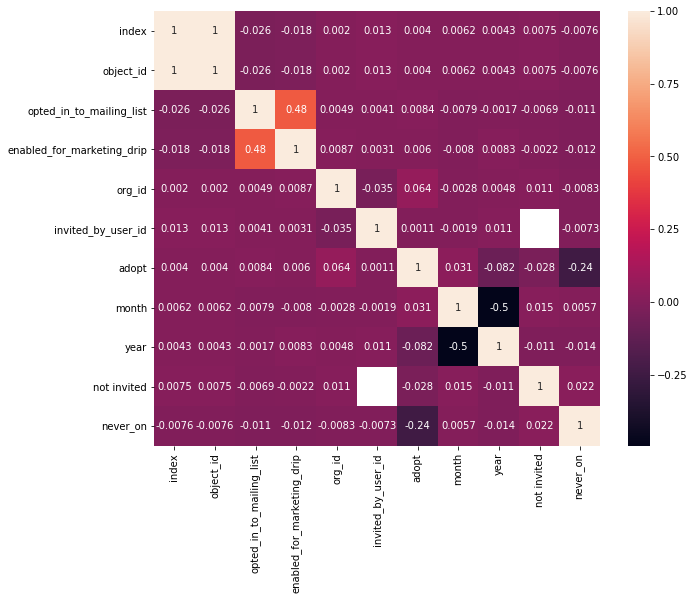

In [15]:
plt.figure(figsize = (10,8))
correlation = users.corr(method = 'kendall')
sns.heatmap(correlation, annot = True)

The never on feature shows some predictability power on the target variable(adopt)

In [16]:
#make a table that groups creation source and adoption
table = (users.groupby(['adopt', 'creation_source'])
         .index.count()
         .rename('count')
         .reset_index())

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

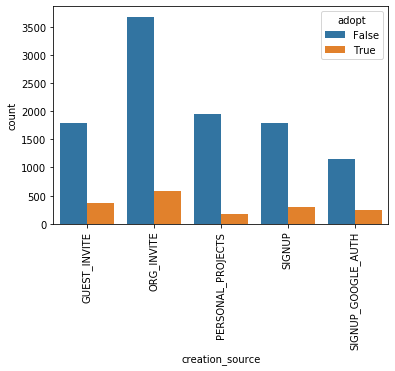

In [17]:
sns.barplot(x = 'creation_source', y = 'count', data = table, hue = 'adopt')
plt.xticks(rotation = 90)

In [18]:
for ind, adopt in enumerate(table.adopt):
    if adopt == False:
        table['count'][ind] = table['count'][ind]/(100-percentage)
    else:
        table['count'][ind] = table['count'][ind]/percentage

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'Relative count')

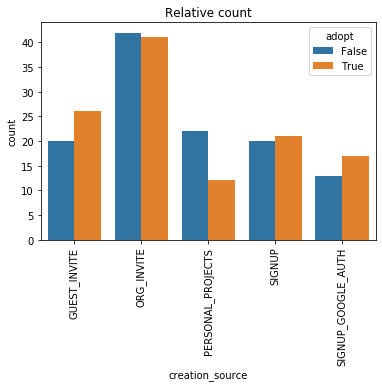

In [19]:
sns.barplot(x = 'creation_source', y = 'count', data = table, hue = 'adopt')
plt.xticks(rotation = 90)
plt.title('Relative count')

The above bar plot shows promise to predict the variability of adopt showing proportional differences in whether users have adopted the platform